In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns; sns.set_theme()
import pandas as pd

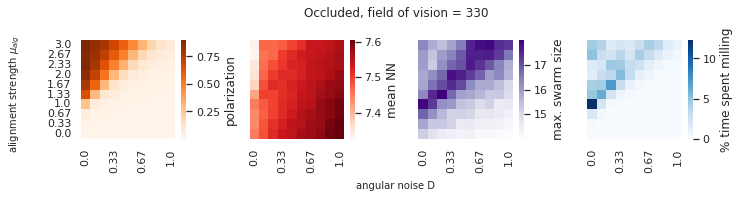

In [7]:

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)



pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
axs[0] = sns.heatmap(df, cbar_kws={'label': "polarization"}, ax = axs[0], 
                 cmap="Oranges")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps) #repradprey

data = np.load("/home/lars/vmodel_output/longsim_dphi_astr_NN_astr_dphi.npy")
data = np.mean(data, axis = 3)
data = np.mean(data, axis = 2)

df = pd.DataFrame(np.flip(data, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[1] = sns.heatmap(df, cbar_kws={'label': "mean NN"}, ax = axs[1], 
                 cmap="Reds")


pol = np.load("/home/lars/vmodel_output/longsim_dphi_astr_maxSize_astr_dphi.npy")

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

axs[2] = sns.heatmap(df, cbar_kws={'label': "max. swarm size"}, ax = axs[2], 
                 cmap="Purples")

mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[3] = sns.heatmap(df*100, cbar_kws={'label': "% time spent milling"}, ax = axs[3], 
                 cmap="Blues")


plt.gcf().set_size_inches(10,2.5)

#plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

fig.text(0.5, -0.03, "angular noise D", ha='center')
fig.text(-0.04, 0.5, "alignment strength " + u'$μ_{alg}$', va='center', rotation='vertical')
fig.suptitle("Occluded, field of vision = 330")
plt.tight_layout()
plt.savefig("HM_multi_dphi_occ_preyvis=330.pdf",bbox_inches="tight")

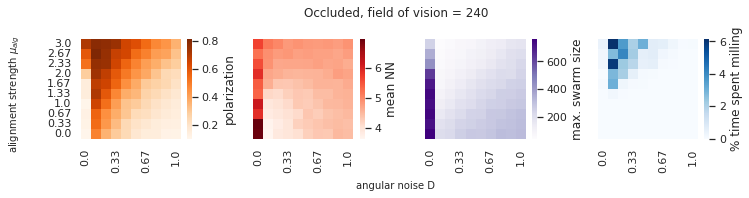

In [9]:

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)



pol = np.load("/home/lars/vmodel_output/longsim_visprey240v2_dphi_astr_occ_Col_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
axs[0] = sns.heatmap(df, cbar_kws={'label': "polarization"}, ax = axs[0], 
                 cmap="Oranges")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps) #repradprey

data = np.load("/home/lars/vmodel_output/longsim_preyvis240v2_dphi_astr_occ_Col_NN_astr_dphi.npy")
data = np.mean(data, axis = 3)
data = np.mean(data, axis = 2)

df = pd.DataFrame(np.flip(data, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[1] = sns.heatmap(df, cbar_kws={'label': "mean NN"}, ax = axs[1], 
                 cmap="Reds")


pol = np.load("/home/lars/vmodel_output/longsim_preyvis240v2_dphi_astr_occ_Col_maxSize_astr_dphi.npy")

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

axs[2] = sns.heatmap(df, cbar_kws={'label': "max. swarm size"}, ax = axs[2], 
                 cmap="Purples")

mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_occ_Col_mill_astr_dphi.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[3] = sns.heatmap(df*100, cbar_kws={'label': "% time spent milling"}, ax = axs[3], 
                 cmap="Blues")


plt.gcf().set_size_inches(10,2.5)

#plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

fig.text(0.5, -0.03, "angular noise D", ha='center')
fig.text(-0.04, 0.5, "alignment strength " + u'$μ_{alg}$', va='center', rotation='vertical')
fig.suptitle("Occluded, field of vision = 240")
plt.tight_layout()
plt.savefig("HM_multi_dphi_occ_preyvis=240.pdf",bbox_inches="tight")

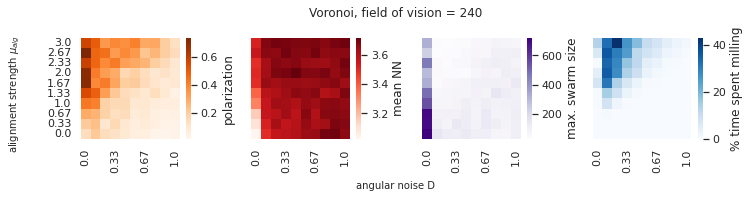

In [10]:

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)



pol = np.load("/home/lars/vmodel_output/longsim_preyvis240v2_dphi_astr_vor_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
axs[0] = sns.heatmap(df, cbar_kws={'label': "polarization"}, ax = axs[0], 
                 cmap="Oranges")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps) #repradprey

data = np.load("/home/lars/vmodel_output/longsim_preyvis240v2_dphi_astr_vor_NN_astr_dphi.npy")
data = np.mean(data, axis = 3)
data = np.mean(data, axis = 2)

df = pd.DataFrame(np.flip(data, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[1] = sns.heatmap(df, cbar_kws={'label': "mean NN"}, ax = axs[1], 
                 cmap="Reds")


pol = np.load("/home/lars/vmodel_output/longsim_preyvis240v2_dphi_astr_vor_maxSize_astr_dphi.npy")

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

axs[2] = sns.heatmap(df, cbar_kws={'label': "max. swarm size"}, ax = axs[2], 
                 cmap="Purples")

mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_mill_astr_dphi.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[3] = sns.heatmap(df*100, cbar_kws={'label': "% time spent milling"}, ax = axs[3], 
                 cmap="Blues")


plt.gcf().set_size_inches(10,2.5)

#plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

fig.text(0.5, -0.03, "angular noise D", ha='center')
fig.text(-0.04, 0.5, "alignment strength " + u'$μ_{alg}$', va='center', rotation='vertical')
fig.suptitle("Voronoi, field of vision = 240")
plt.tight_layout()
plt.savefig("HM_multi_dphi_vor_preyvis=240.pdf",bbox_inches="tight")

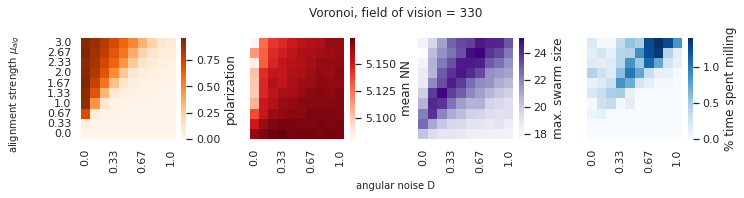

In [12]:

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)



pol = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
axs[0] = sns.heatmap(df, cbar_kws={'label': "polarization"}, ax = axs[0], 
                 cmap="Oranges")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps) #repradprey

data = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_NN_astr_dphi.npy")
data = np.mean(data, axis = 3)
data = np.mean(data, axis = 2)

df = pd.DataFrame(np.flip(data, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[1] = sns.heatmap(df, cbar_kws={'label': "mean NN"}, ax = axs[1], 
                 cmap="Reds")


pol = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_maxSize_astr_dphi.npy")

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

axs[2] = sns.heatmap(df, cbar_kws={'label': "max. swarm size"}, ax = axs[2], 
                 cmap="Purples")

mill = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_mill3_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:]-90)
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[3] = sns.heatmap(df*100, cbar_kws={'label': "% time spent milling"}, ax = axs[3], 
                 cmap="Blues")


plt.gcf().set_size_inches(10,2.5)

#plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

fig.text(0.5, -0.03, "angular noise D", ha='center')
fig.text(-0.04, 0.5, "alignment strength " + u'$μ_{alg}$', va='center', rotation='vertical')
fig.suptitle("Voronoi, field of vision = 330")
plt.tight_layout()
plt.savefig("HM_multi_dphi_vor_preyvis=330.pdf",bbox_inches="tight")

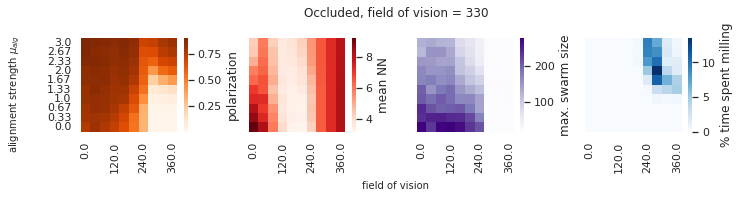

In [13]:

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)



pol = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_pol_astr_visPrey.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
axs[0] = sns.heatmap(df, cbar_kws={'label': "polarization"}, ax = axs[0], 
                 cmap="Oranges")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
#paraChange2_val = np.linspace(0,1,steps) #repradprey

data = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_NN_astr_visPrey.npy")
data = np.mean(data, axis = 3)
data = np.mean(data, axis = 2)

df = pd.DataFrame(np.flip(data, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[1] = sns.heatmap(df, cbar_kws={'label': "mean NN"}, ax = axs[1], 
                 cmap="Reds")


pol = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_maxSize_astr_visPrey.npy")

paraChange1_val = np.linspace(0,3,steps)
#paraChange2_val = np.linspace(0,1,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

axs[2] = sns.heatmap(df, cbar_kws={'label': "max. swarm size"}, ax = axs[2], 
                 cmap="Purples")


mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_mill_astr_visPrey.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
#paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[3] = sns.heatmap(df*100, cbar_kws={'label': "% time spent milling"}, ax = axs[3], 
                 cmap="Blues")

####

plt.gcf().set_size_inches(10,2.5)

#plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

fig.text(0.5, -0.03, "field of vision", ha='center')
fig.text(-0.04, 0.5, "alignment strength " + u'$μ_{alg}$', va='center', rotation='vertical')
fig.suptitle("Occluded, field of vision = 330")
plt.tight_layout()
plt.savefig("HM_multi_preyvis_occ.pdf",bbox_inches="tight")

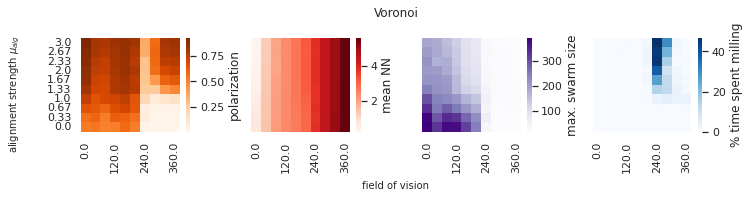

In [15]:

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)



pol = np.load("/home/lars/vmodel_output/longsim_visPrey_astr_vor_pol_astr_visPrey.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
axs[0] = sns.heatmap(df, cbar_kws={'label': "polarization"}, ax = axs[0], 
                 cmap="Oranges")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
#paraChange2_val = np.linspace(0,1,steps) #repradprey

data = np.load("/home/lars/vmodel_output/longsim_visPrey_astr_vor_NN_astr_visPrey.npy")
data = np.mean(data, axis = 3)
data = np.mean(data, axis = 2)

df = pd.DataFrame(np.flip(data, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[1] = sns.heatmap(df, cbar_kws={'label': "mean NN"}, ax = axs[1], 
                 cmap="Reds")


pol = np.load("/home/lars/vmodel_output/longsim_visPrey_astr_vor_maxSize_astr_visPrey.npy")

paraChange1_val = np.linspace(0,3,steps)
#paraChange2_val = np.linspace(0,1,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

df = pd.DataFrame(np.flip(pol, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

axs[2] = sns.heatmap(df, cbar_kws={'label': "max. swarm size"}, ax = axs[2], 
                 cmap="Purples")


mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_visPrey_astr_vor_mill_astr_visPrey.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
#paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


axs[3] = sns.heatmap(df*100, cbar_kws={'label': "% time spent milling"}, ax = axs[3], 
                 cmap="Blues")

####

plt.gcf().set_size_inches(10,2.5)

#plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

fig.text(0.5, -0.03, "field of vision", ha='center')
fig.text(-0.04, 0.5, "alignment strength " + u'$μ_{alg}$', va='center', rotation='vertical')
fig.suptitle("Voronoi")
plt.tight_layout()
plt.savefig("HM_multi_preyvis_vor.pdf",bbox_inches="tight")